# Classification with Hidden Features

<hr>

- You are hired by a company
- They classified the datasets but the features are hidden (you don't know what they are)
- Create a model to predict classes and the accuracy
- Are some features more important than others?

In [1]:
# import the libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

In [2]:
# import data
data = pd.read_csv('./data/classified_data.csv',index_col=0)
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
len(data)

1000

In [4]:
data.shape

(1000, 11)

In [5]:
data.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [6]:
data['TARGET CLASS'].count()

1000

In [7]:
data['TARGET CLASS'].value_counts()

TARGET CLASS
1    500
0    500
Name: count, dtype: int64

In [8]:
data.dtypes

WTT             float64
PTI             float64
EQW             float64
SBI             float64
LQE             float64
QWG             float64
FDJ             float64
PJF             float64
HQE             float64
NXJ             float64
TARGET CLASS      int64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [10]:
data.isna().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [11]:
# Dependent and Independent variables
X = data.drop('TARGET CLASS',axis=1)
y = data['TARGET CLASS']

<hr>

## SVC MODEL

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [13]:
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.955

In [14]:
# most important features
perm_importance = permutation_importance(svc,X_test,y_test)

In [15]:
perm_importance.importances_mean

array([0.041, 0.021, 0.086, 0.001, 0.004, 0.01 , 0.006, 0.054, 0.095,
       0.001])

In [16]:
sorted_idx = perm_importance.importances_mean.argsort()
sorted_idx

array([3, 9, 4, 6, 5, 1, 0, 7, 2, 8], dtype=int64)

<AxesSubplot:>

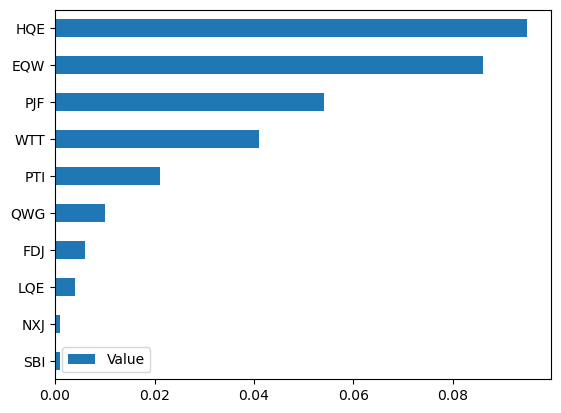

In [17]:
df = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
df.plot.barh()

<hr>

## KNN MODEL

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.955

In [20]:
# most important feature
perm_importance = permutation_importance(knn,X_test,y_test)
perm_importance.importances_mean

array([0.055, 0.032, 0.057, 0.007, 0.021, 0.01 , 0.015, 0.066, 0.074,
       0.013])

<AxesSubplot:>

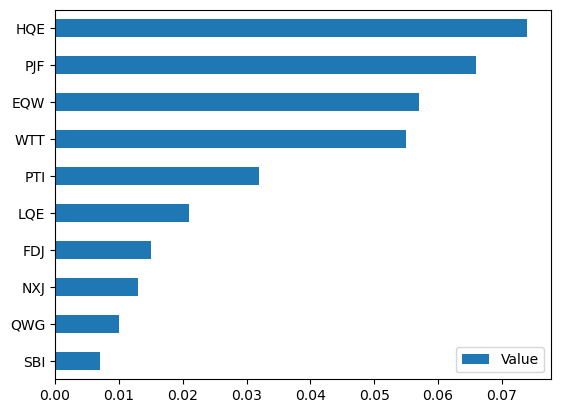

In [21]:
sorted_idx = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
df.plot.barh()

**Conclusion**

In [22]:
# HQE, EQW, PJF are the most important features